# Pound Drever Hall Analysis

This Notebook will contain design specs, analysis, calculations etc for the Pound Drever Hall Project

## Purpose of the Project
An optical cavity is formed by two or more mirrors which highly reflect incident light except for a set of narrow <i>resonant</i> frequencies, for which the cavity is highly transmissive. 

The point of this project is to stabilize the length of a cavity so that an incoming "lock beam" will always be resonant to it (i.e. experience maximum transmission). 

The Pound Drever Hall (PDH) technique is a tried, tested and true method for accomplishing this. Essentially PDH works by modulating the incoming light creating sidebands at frequecy $\pm \Omega$ that are reflected from the cavity, and using these sidebands to create an error signal proportional to the deviation of the cavity from resonance.

This project aims to create the electronics, mechanical assemble, and optics to create a PDH lock


### TODO ###
- Tutorial of Physics
- Calculation of parameters
- Add references

## DESIGN SPECS
(Calculations to follow)

### What modulation frequency do we want?
- Our cavity will have a length of around 2.5 to 10 cm. This corresponds to an FSR of 1.5 to 6 GHz. Our relflectivity is on the order of R ~ 1 - 0.001. This corresponds to a finesse of about 1000*pi, let's just call it 3000. Given this our linewidth (FWHM) is between 1 and 4 MHz. Since we want our sidebands to be about 10x a linewidth, we really expect our primary frequency to be about 10 to 40 MHz.

What are the relevant signal
- It can be shown that the optimal slope occurs when each sideband has half the power of the carrier. We will actually need fairly high bandwidth detectors (100 MHz say). Our light will have a power in the order of 100 &mu;W and so we will have each sideband at about 25 &mu;W. However, we may not get down to this level so that we should expect a signal as low as 5&mu;W at the modulation frequency. With a transimpedance gain of 100k&Omega; and a responsivity of 0.5 A/W we can thus expect a signal level of about 250 mV. This seems high ... however if this is not achievable with a single stage, we can have a second gain stage at the output. 

What kind of load are we driving?
- We will drive a Piezo connected to a mirror (which is essentially a capacitive load, w/ $C_{DC} \approx 1~\mu F$
- We will need a fairly large voltage gain here, since the piezo will require about 100 V to move a full stroke. 
- Our mechanical bandwidth is about 10 kHz, so we don't need anything faster than that.

# Tutorial of relevant Physics

### TLDR
PDH stabilizes a cavity by creating sidebands on a laser and observing the phase of these sidebands upon reflection from the cavity with respect to the modulation. Since a cavity induces a frequency dependant phase shift on the reflected beam, this phase shift gives a DC signal directly proportional to the deviation from cavity resonance, which can be used in a servo loop.

### Introduction
The essential idea of the Pound Drever Hall (PDH) technique is that we want to stabilize the <b>releative</b> frequncy of a laser and an optical cavity. In one set of circumstances (LIGO for example) an ultrastable cavity is used to stabilize the frequency of a laser. In other circumstances (such as our applications in atomic physics) a separately stabilized laser is used to stabilize the resonant frequency of a cavity by modulating its length. In general, neither the laser or the cavity need be intrinsically stable, but the PDH technique will ensure realtive stability, so that their deviations will track one anothers and the laser will always be resonant to the cavity. 

### Fabry Perot Cavities
A Fabry Perot Cavity, in its simplest form is a pair of parallel mirrors or reflectivity $R$ separated by a distance $L$. 

At the interface, a beam of light $E_{in}$ is partially reflected $E_r = rE_{in}$ and partially transmitted (E_t = tE_{in}). We consider a pair of mirrors in which the interior has index of refraction $n$ and is surrounded by air $n\approx1$. Since the first reflection is external reflection (i.e. going from a low to high index) it is accompanied by a $\pi$ phase shift and thus is negative ($e^{i\pi} = -1$). The second mirror is internal reflection and thus has no phase shift. 

In the lab, we measure the time averaged intesity $I = \langle \varepsilon_0 c\vert E\vert^2\rangle \propto \vert E\vert^2$ so we define the portion of reflected and transmitted power as:

\begin{align}
\mathcal{R} &\equiv \frac{E_r}{E_{in}} \\
\mathcal{T} &\equiv \frac{E_t}{E_{in}}
\end{align}

Since there are multiple internal reflections inside the cavity, the transmission is not simply $\vert t^2 \vert^2 = t^4$ as you might expect but is a rapidly changing function of the cavity length with respect to the light's wavelength. Very much counter intuitively, it can reach 100% transmission in the steady state, even with 99.999% refelctivity mirrors!

The key to understanding the behaviour of the Fabry Perot cavity's transmission behaviour is that, initially, nearly all the light is reflected and a very small amount leaks into the cavity. After some time, light has been continuously building up inside the cavity and a small portion leaks out the front and rear faces due to the small transmission through the mirrors. For certain geometries, specifically, if  the cavity length $L$ is an integer number of half-wavelengths of the incident light, the light bouncing back and forth inside the cavity constructively interferes and is greatly enhanced. In this case, the cavity is said to be <em>resonant</em>. When the condition for resonance is met, the light leaking out the back face is equal in magnitude and opposite in phase with the incident light that is bouncing off the first mirror and the reflected field thus vanishes. The light leaking through the opposite side is likewise equal in magnitude to the incident light, so we have the appearance of 100% transmission. 

To calculate $\mathcal{F}$ and $\mathcal{T}$ analytically, we can formally sum the fields in the above figure. Each time the light propagates though the cavity, it picks up a phase factor $e^{ink_0L} = e^{ikL}$ where $kL = 2\pi \times nL\lambda$ can be seen as the number of optical cycles corresponding to the transit between the mirrors. The transmitted light from the intial beam that goes right through the cavity is then $\left(t \times e^{ikL} \times t\right)E_{in} = t^2e^{i\phi}E_{in}$ (where we've written $\phi = ikL$). 

### The Phase and Amplitude of the Reflected Signal
From the above calculation, the reflected E-field is the sum of two terms: the directly reflected incident field and the portion of the intracavity field which leaks through the first mirror:

$$
\frac{E_{in}}{E_r}\equiv\mathcal{R} = \frac{-r}{1+r^2e^{i\Delta}} + \frac{re^{i\Delta}}{1+r^2e^{i\Delta}}
$$

... where $\Delta \equiv 2\pi f/f_{fsr}$ is the frequency as a multiple of free spectral lengths. The reflected field thus acquires a phase $\phi(\Delta)$ given by $\tan(\phi(\Delta)) = \text{Im}\left[\mathcal{R}\right]/\text{Re}\left[\mathcal{R}\right]$ and has a power proportional to $\vert \mathcal{R}\vert^2$. Far away from resonance the field experiences a $\pm\pi$ phase shift (i.e. is multiplied by $-1$ either way) and approaches a purely real number. Near resonance however, the phase is $\phi = \pm \pi/2$ (experiencing a $\pi$ discontinuity at the zero-crossing) and is thus $\mathcal{R}$ becomes purely imaginary. This fact is handy for understanding the PDH behaviour empirically. 

Populating the interactive namespace from numpy and matplotlib


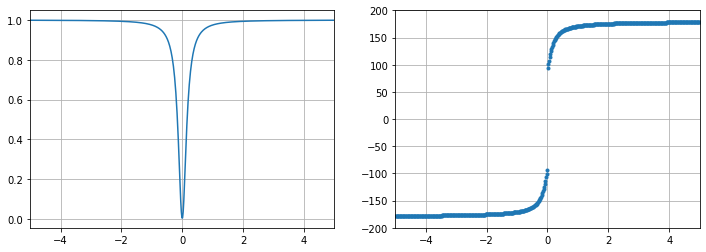

In [31]:
%pylab inline

delta = 2*pi*linspace(-0.05,.05,500)
r = sqrt(0.99)
R = r*(exp(1j*delta)-1)/(1-exp(1j*delta)*r**2)
fig,(ax1,ax2) = subplots(1,2,figsize=[12,4])
ax1.plot(100*delta/(2*pi),abs(R)**2)
ax2.plot(100*delta/(2*pi),angle(R)*180/pi,'.')
ax1.grid(True)
ax2.grid(True)
ax2.set_ylim([-200,200])
ax1.set_xlim([-5,5])
ax2.set_xlim([-5,5]);

## Creating sidebands

The "PDH trick" is to apply a fast modulation to the phase of the laser beam so that sidebands are created at some frequency separation $\pm\Omega$ that is much larger than the transmission profile of the cavity. In this regime, something magical happens when the laser is near cavity resonance: the sidebands are completely reflected and minute deviations from true resonance correspond to a linear phase shift that is proportional to deviation from resonance. Mixing the beat reflected signal with the local oscillator creating the modulation in the first place produces an error signal that can be used in feedback to lock the system on resonanace. Not only do we get this, but the original beam is then passed through the cavity, but without sidebands and can thus be used down line in the experiment.